In [1]:
import math, random, os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]
type(X)

pandas.core.frame.DataFrame

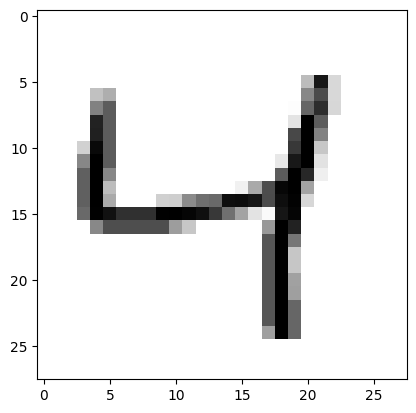

'4'

In [3]:
some_digit_index = 2
some_digit = X.values[some_digit_index]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.show()
y[some_digit_index]

In [4]:
y = y.astype(int)
X_train, X_test, y_train, y_test = X.values[:60000], X.values[60000:], y[:60000], y[60000:]
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
y_train_binary = (y_train == 4)
y_test_binary = (y_test == 4)
y_train_binary

10917    False
33751    False
1517     False
34219    False
50676    False
         ...  
52777    False
36957    False
50731    False
13396    False
8769      True
Name: class, Length: 60000, dtype: bool

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=500, random_state=42)
sgd_clf.fit(X_train, y_train_binary)

SGDClassifier(max_iter=500, random_state=42)

In [7]:
sgd_clf.predict([some_digit])

array([ True])

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_binary, cv=3, scoring="accuracy")

array([0.9724 , 0.97685, 0.9776 ])

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_binary):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_binary[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_binary[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.69505
0.8609
0.4316


In [10]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_binary, cv=3, scoring="accuracy")

array([0.903  , 0.90205, 0.90285])

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_binary, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_binary, y_train_pred)

array([[53483,   675],
       [  788,  5054]])

In [12]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_binary, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_binary, y_scores)

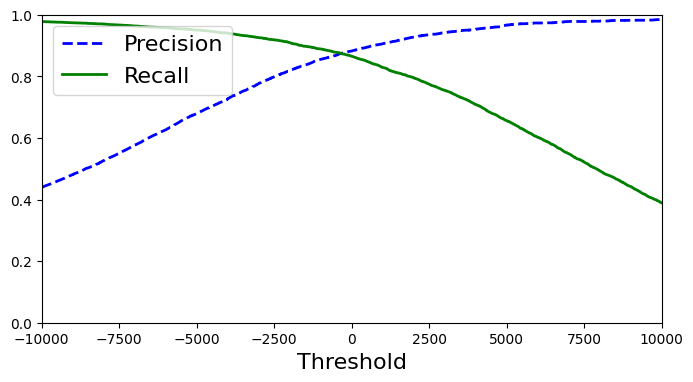

In [13]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10000, 10000])
plt.show()

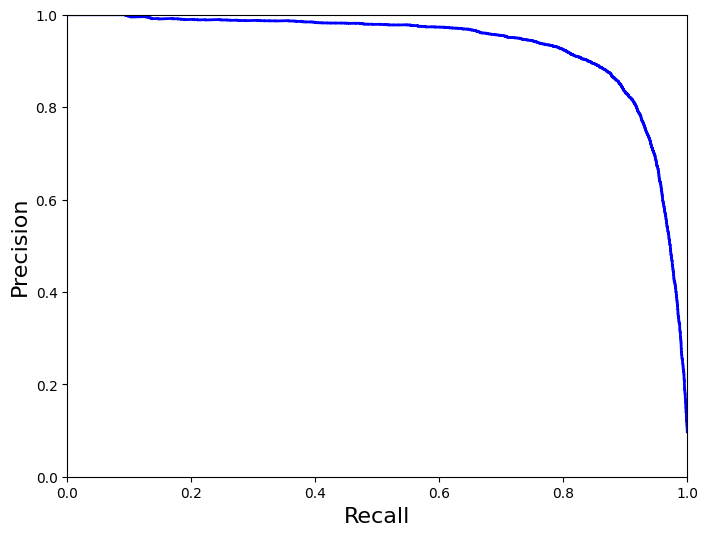

In [14]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

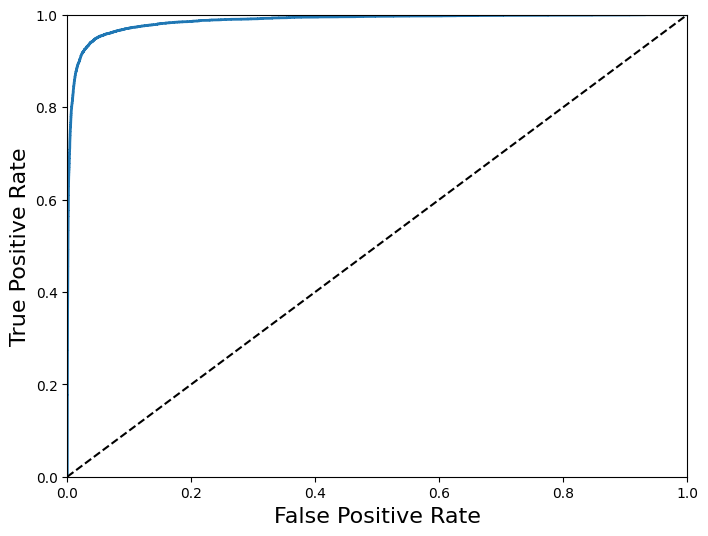

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_binary, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

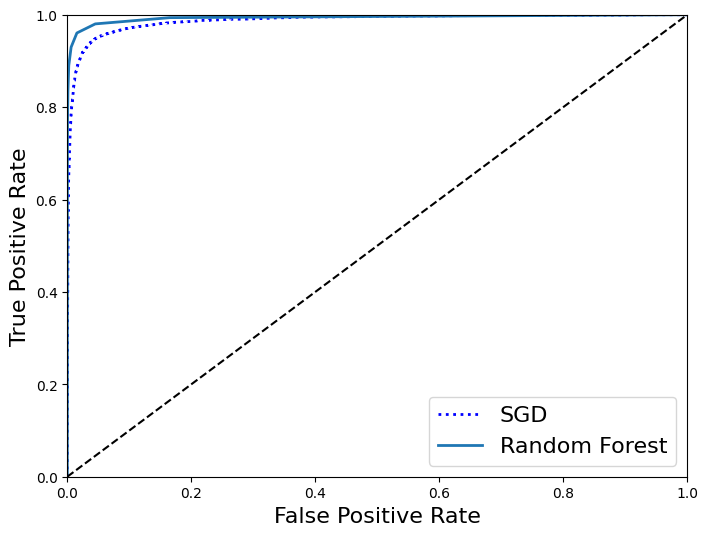

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_binary, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_binary,y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [17]:
y_scores_forest

array([0. , 0. , 0. , ..., 0. , 0. , 0.9], shape=(60000,))

In [20]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([4, 4])

In [19]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-35858.51070086, -18996.72864581,  -6851.81062535,
          -353.67671668,   7032.82470464, -15698.70041712,
        -32629.72057737,  -1666.97486517,  -7783.3913624 ,
        -13790.36003327]])

In [22]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8727 , 0.87795, 0.87825])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/home/eugen/PhpstormProjects/ai_learn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/eugen/PhpstormProjects/ai_learn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/eugen/PhpstormProjects/ai_learn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90885, 0.90855, 0.90875])

In [24]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/home/eugen/PhpstormProjects/ai_learn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/eugen/PhpstormProjects/ai_learn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/eugen/PhpstormProjects/ai_learn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5639,    0,   16,    9,   11,   56,   39,    6,  146,    1],
       [   1, 6426,   51,   21,    4,   45,    7,    8,  164,   15],
       [  28,   31, 5321,   90,   78,   30,   68,   41,  261,   10],
       [  32,   23,  126, 5313,    2,  240,   23,   41,  257,   74],
       [  10,   15,   48,   15, 5321,   11,   46,   23,  187,  166],
       [  34,   20,   33,  174,   55, 4588,   86,   20,  333,   78],
       [  27,   18,   57,    2,   37,  100, 5575,    5,   97,    0],
       [  20,   17,   63,   23,   50,   10,    3, 5756,   87,  236],
       [  23,   70,   57,  107,    4,  122,   38,   12, 5356,   62],
       [  27,   22,   30,   66,  131,   36,    1,  181,  227, 5228]])

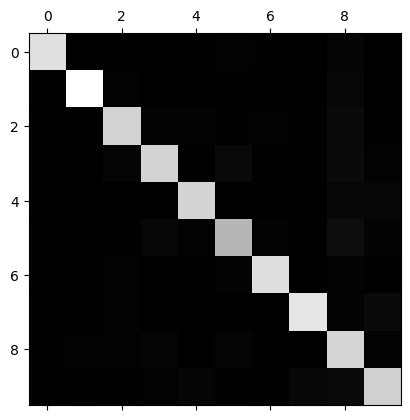

In [25]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

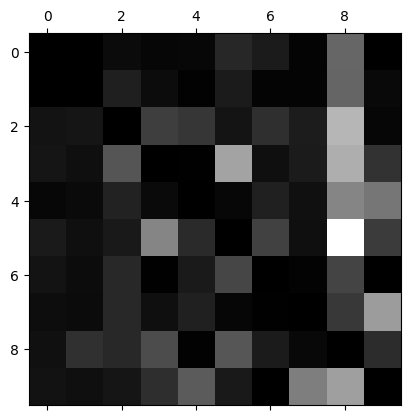

In [26]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False, False]])

In [29]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.97732388499842